<a href="https://colab.research.google.com/github/KaziShahHamza/Wildfire_Prediciton_Research/blob/main/Thesis_Codes_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Load Dataset
import pandas as pd

file_path = '/content/drive/MyDrive/datasets/PREPROCESSED_01_CA_Weather_Fire_Dataset_1984-2025.csv'

# Read the CSV file
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# View top rows
print("First 5 rows:\n", df.head(), "\n")

# Shape of dataset
print("Shape:", df.shape)

# Column names and data types
print("\n Columns and Data Types:\n")
print(df.dtypes)

print("\n Data Types and Info:")
print(df.info())

# Basic stats for numeric columns
print("\n Statistical Summary:\n")
print(df.describe())

# Check missing values
print("\n Missing Values per Column:\n")
print(df.isnull().sum())

# Unique values in each column (useful for categorical data)
print("\n🔹 Unique Value Counts:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 4. Optional: Display dataframe interactively
# (Only works in Colab — shows scrollable table)
from IPython.display import display
display(df.head(10))


First 5 rows:
          DATE  PRECIPITATION  MAX_TEMP  MIN_TEMP  AVG_WIND_SPEED  \
0  1984-01-01            0.0      79.0      51.0            4.70   
1  1984-01-02            0.0      71.0      46.0            5.59   
2  1984-01-03            0.0      70.0      47.0            5.37   
3  1984-01-04            0.0      76.0      45.0            4.70   
4  1984-01-05            0.0      74.0      49.0            5.14   

   FIRE_START_DAY  YEAR  TEMP_RANGE  WIND_TEMP_RATIO  MONTH  ...  SEASON_Fall  \
0               0  1984        28.0         0.059494      1  ...          0.0   
1               0  1984        25.0         0.078732      1  ...          0.0   
2               0  1984        23.0         0.076714      1  ...          0.0   
3               0  1984        31.0         0.061842      1  ...          0.0   
4               0  1984        25.0         0.069459      1  ...          0.0   

   SEASON_Spring  SEASON_Summer  SEASON_Winter  TEMP_MEAN  IS_RAINY  \
0            0.0  

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,...,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter,TEMP_MEAN,IS_RAINY,WIND_CATEGORY_Extreme,WIND_CATEGORY_High,WIND_CATEGORY_Low,WIND_CATEGORY_Moderate
0,1984-01-01,0.0,79.0,51.0,4.70,0,1984,28.0,0.059494,1,...,0.0,0.0,0.0,1.0,65.0,0,0.0,0.0,1.0,0.0
1,1984-01-02,0.0,71.0,46.0,5.59,0,1984,25.0,0.078732,1,...,0.0,0.0,0.0,1.0,58.5,0,0.0,0.0,0.0,1.0
2,1984-01-03,0.0,70.0,47.0,5.37,0,1984,23.0,0.076714,1,...,0.0,0.0,0.0,1.0,58.5,0,0.0,0.0,0.0,1.0
3,1984-01-04,0.0,76.0,45.0,4.70,0,1984,31.0,0.061842,1,...,0.0,0.0,0.0,1.0,60.5,0,0.0,0.0,1.0,0.0
4,1984-01-05,0.0,74.0,49.0,5.14,0,1984,25.0,0.069459,1,...,0.0,0.0,0.0,1.0,61.5,0,0.0,0.0,0.0,1.0
5,1984-01-06,0.0,65.0,49.0,7.38,0,1984,16.0,0.113538,1,...,0.0,0.0,0.0,1.0,57.0,0,0.0,0.0,0.0,1.0
6,1984-01-07,0.0,59.0,54.0,5.82,0,1984,5.0,0.098644,1,...,0.0,0.0,0.0,1.0,56.5,0,0.0,0.0,0.0,1.0
7,1984-01-08,0.0,59.0,55.0,3.36,0,1984,4.0,0.056949,1,...,0.0,0.0,0.0,1.0,57.0,0,0.0,0.0,1.0,0.0
8,1984-01-09,0.0,61.0,54.0,6.71,0,1984,7.0,0.110000,1,...,0.0,0.0,0.0,1.0,57.5,0,0.0,0.0,0.0,1.0
9,1984-01-10,0.0,70.0,47.0,4.70,0,1984,23.0,0.067143,1,...,0.0,0.0,0.0,1.0,58.5,0,0.0,0.0,1.0,0.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler


In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# View numeric columns
print("Numeric columns:", list(numeric_cols))


Numeric columns: ['PRECIPITATION', 'MAX_TEMP', 'MIN_TEMP', 'AVG_WIND_SPEED', 'FIRE_START_DAY', 'YEAR', 'TEMP_RANGE', 'WIND_TEMP_RATIO', 'MONTH', 'LAGGED_PRECIPITATION', 'LAGGED_AVG_WIND_SPEED', 'DAY_OF_YEAR', 'DAY', 'WEEK', 'QUARTER', 'SEASON_Fall', 'SEASON_Spring', 'SEASON_Summer', 'SEASON_Winter', 'TEMP_MEAN', 'IS_RAINY', 'WIND_CATEGORY_Extreme', 'WIND_CATEGORY_High', 'WIND_CATEGORY_Low', 'WIND_CATEGORY_Moderate']


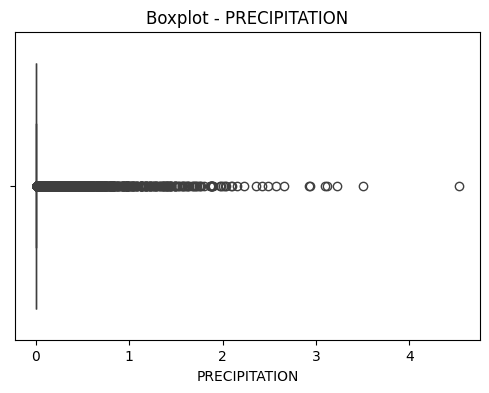

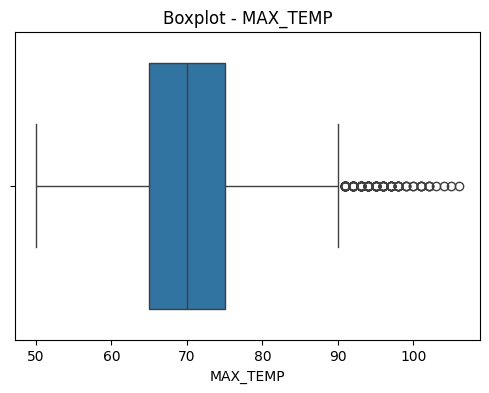

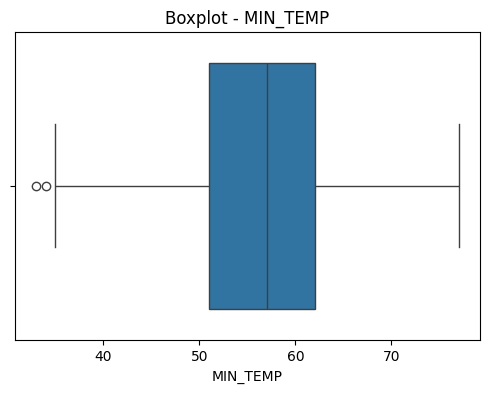

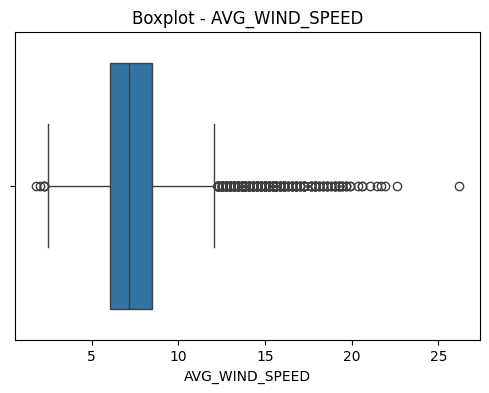

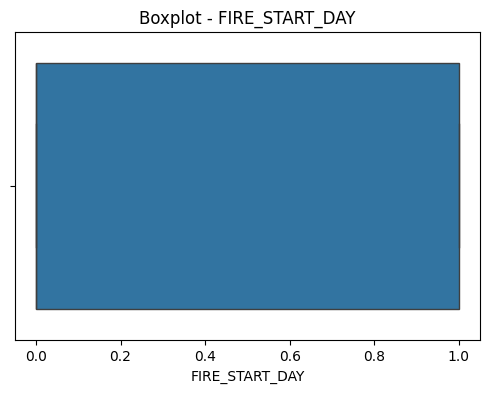

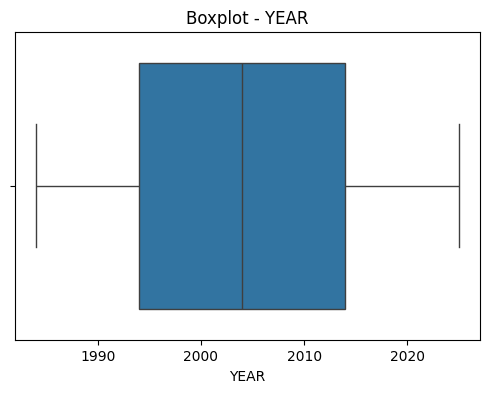

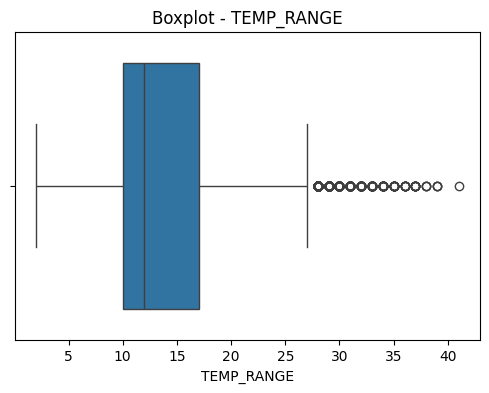

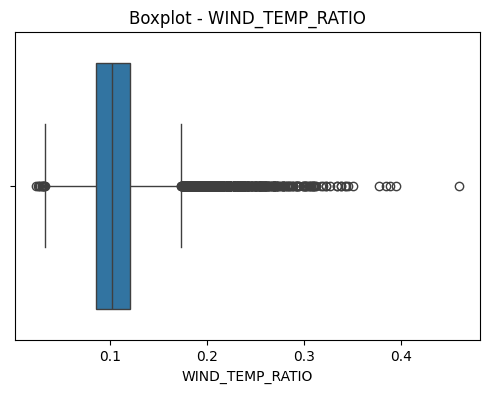

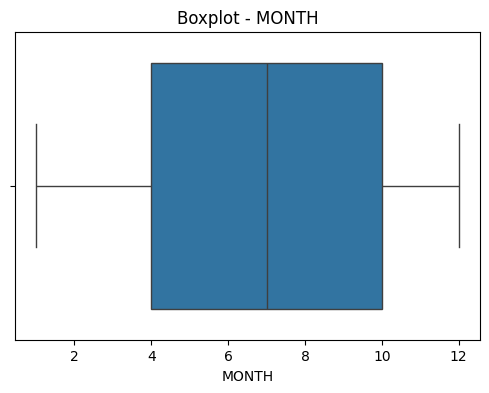

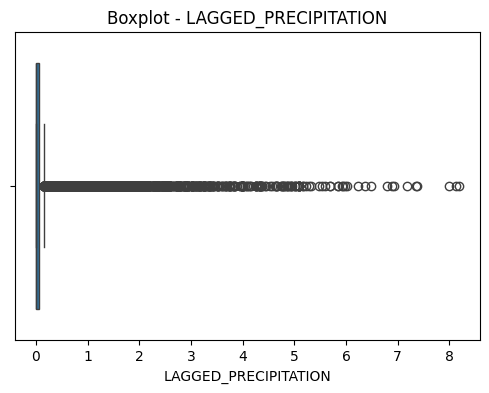

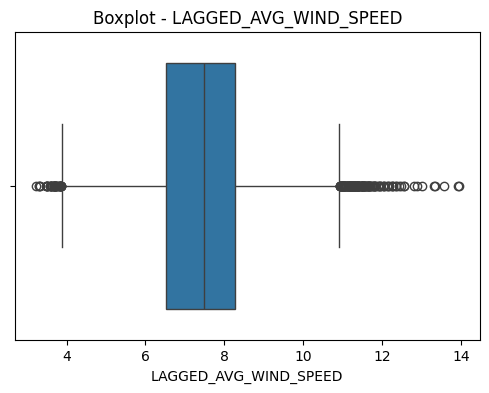

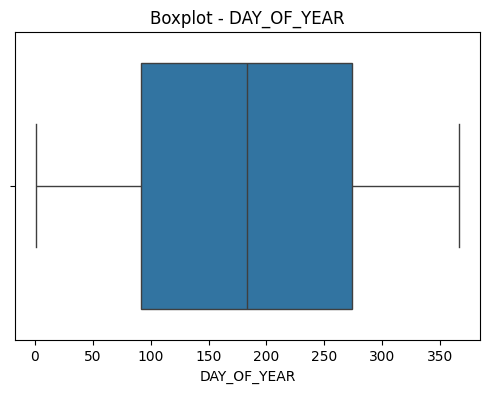

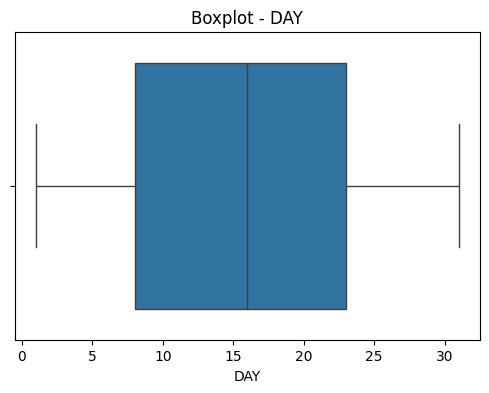

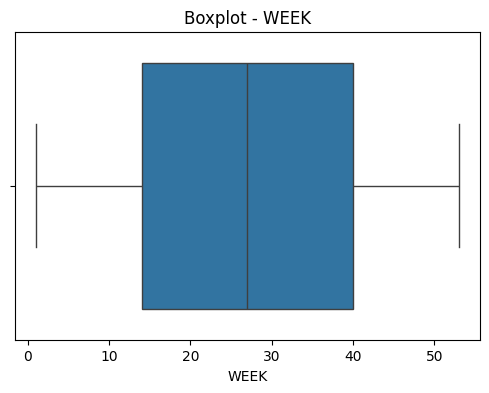

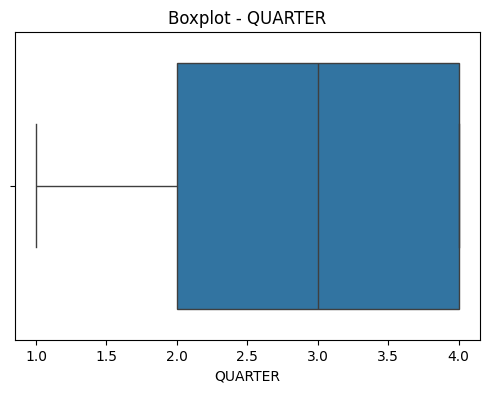

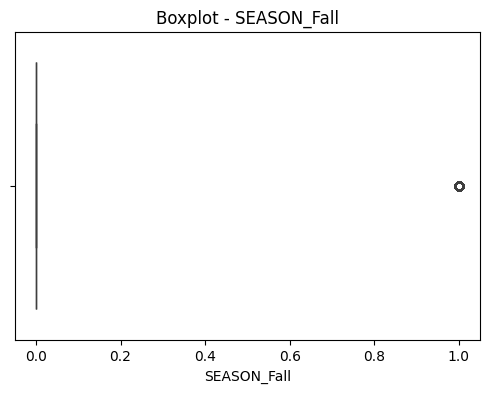

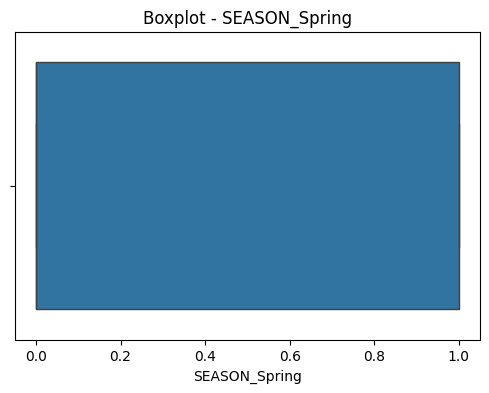

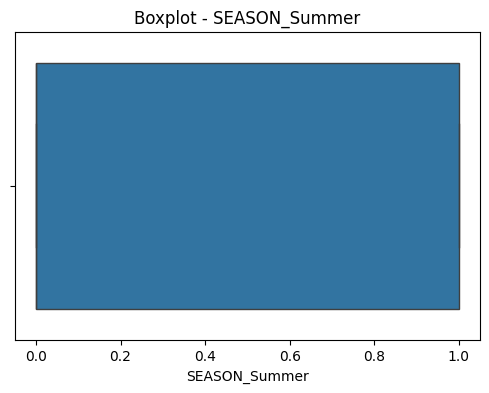

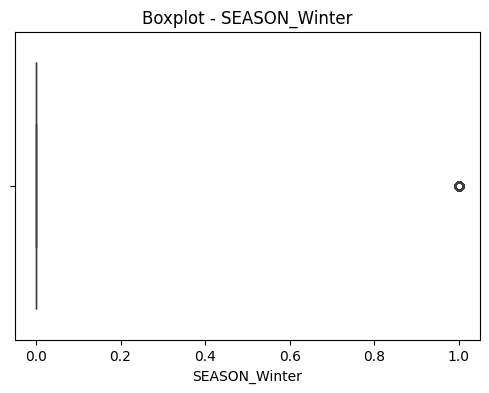

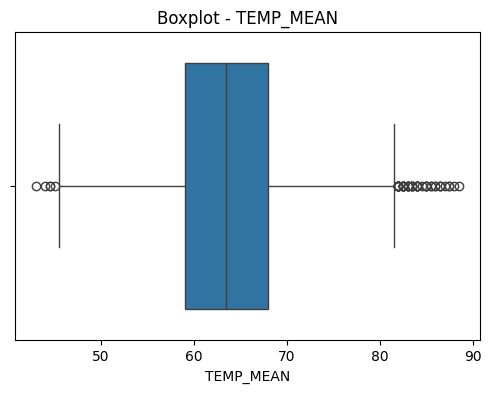

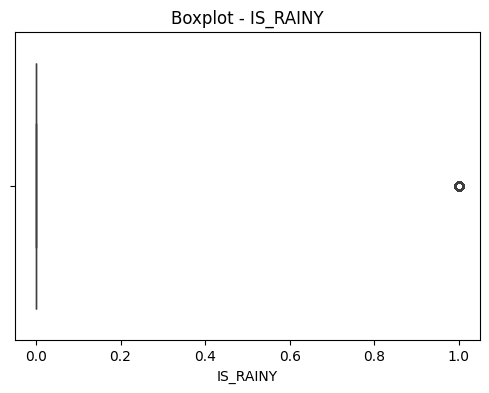

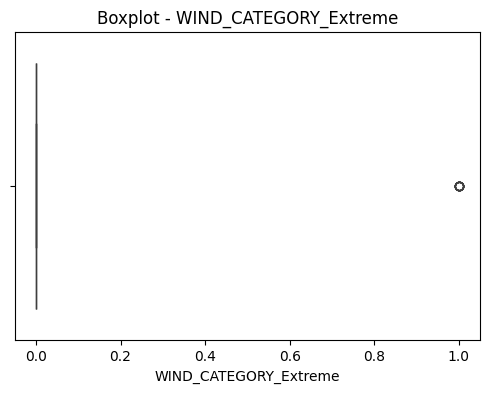

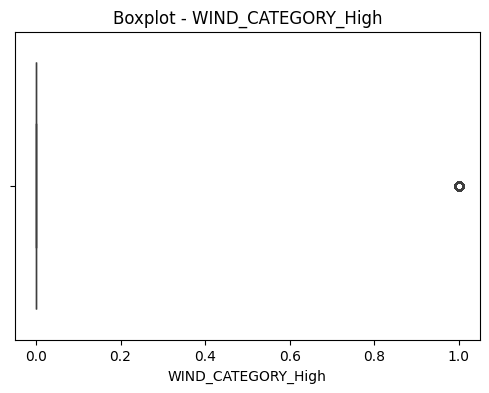

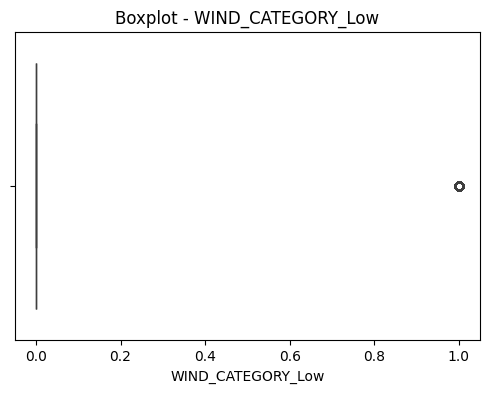

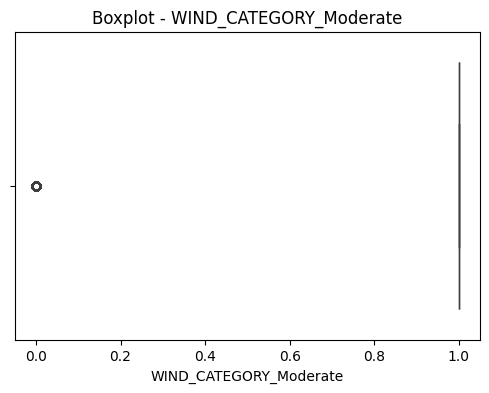

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

# Example for one column:
outliers_temp = detect_outliers_iqr(df, 'MAX_TEMP')
print(f"Outliers in MAX_TEMP: {len(outliers_temp)}")

# Apply for all numeric columns
outlier_counts = {col: len(detect_outliers_iqr(df, col)) for col in numeric_cols}
print("Outlier counts per column:\n", outlier_counts)


Outliers in MAX_TEMP: 161
Outlier counts per column:
 {'PRECIPITATION': 1381, 'MAX_TEMP': 161, 'MIN_TEMP': 2, 'AVG_WIND_SPEED': 479, 'FIRE_START_DAY': 0, 'YEAR': 0, 'TEMP_RANGE': 573, 'WIND_TEMP_RATIO': 736, 'MONTH': 0, 'LAGGED_PRECIPITATION': 3065, 'LAGGED_AVG_WIND_SPEED': 187, 'DAY_OF_YEAR': 0, 'DAY': 0, 'WEEK': 0, 'QUARTER': 0, 'SEASON_Fall': 3731, 'SEASON_Spring': 0, 'SEASON_Summer': 0, 'SEASON_Winter': 3713, 'TEMP_MEAN': 57, 'IS_RAINY': 1381, 'WIND_CATEGORY_Extreme': 9, 'WIND_CATEGORY_High': 1351, 'WIND_CATEGORY_Low': 1451, 'WIND_CATEGORY_Moderate': 2811}


In [ ]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers_iqr(df.copy(), numeric_cols)
print(f"Original shape: {df.shape}, After outlier removal: {df_clean.shape}")


Original shape: (14988, 26), After outlier removal: (5465, 26)


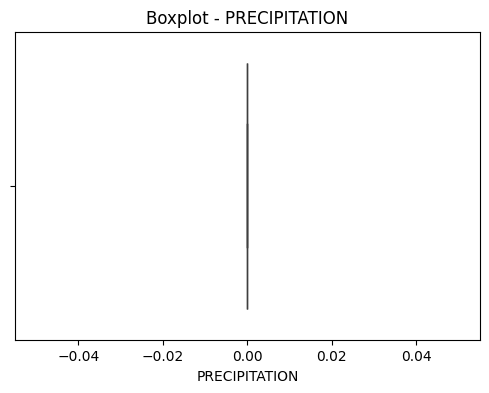

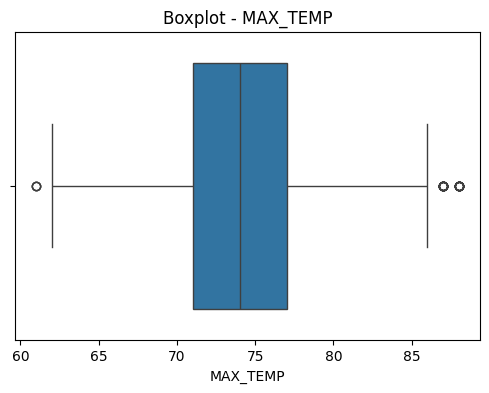

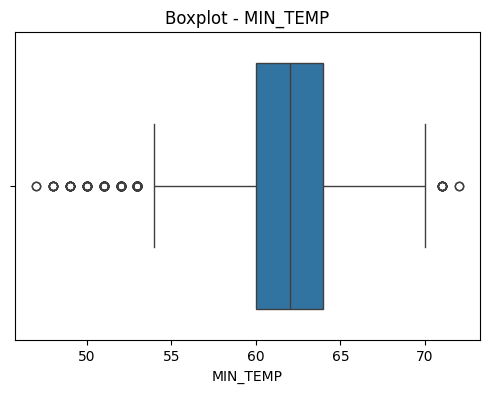

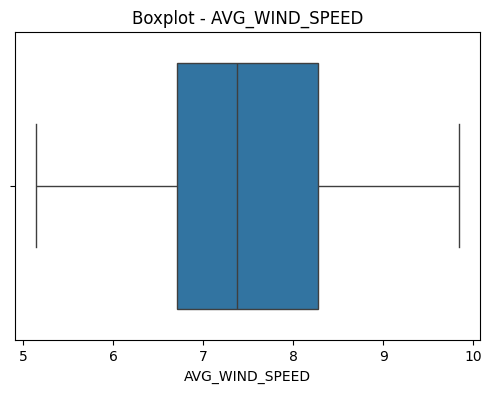

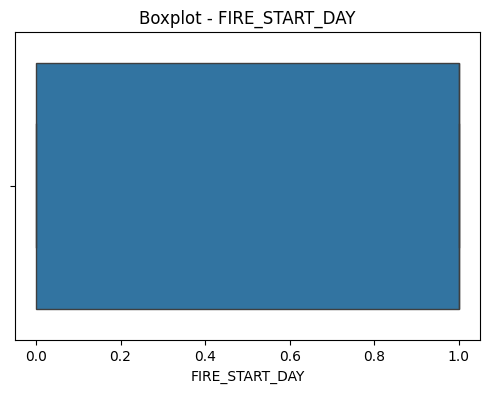

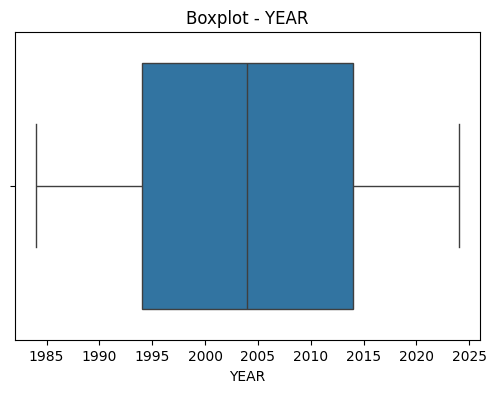

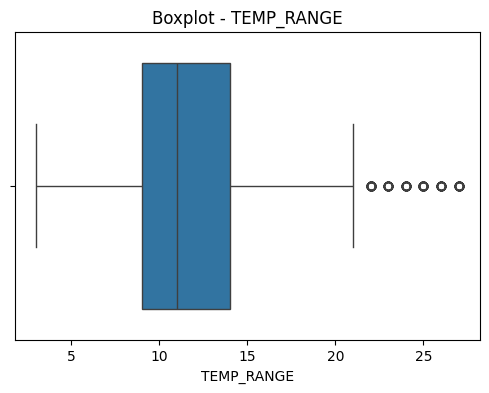

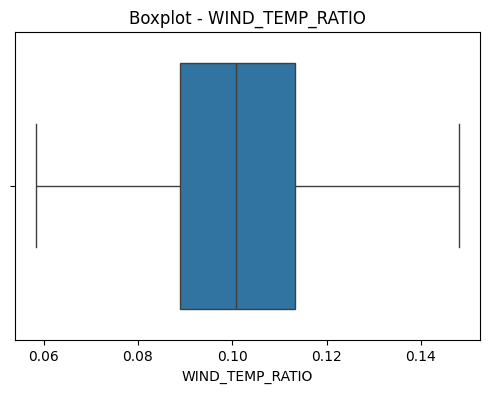

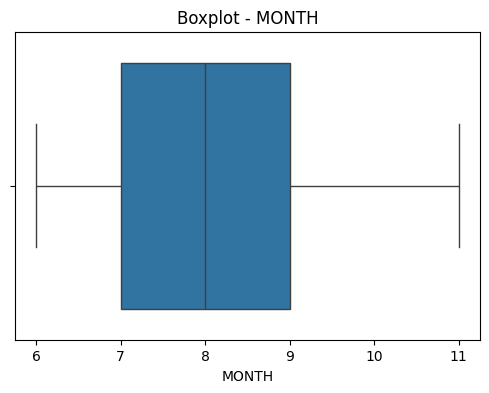

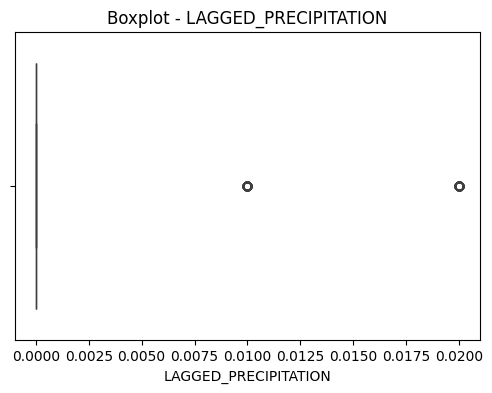

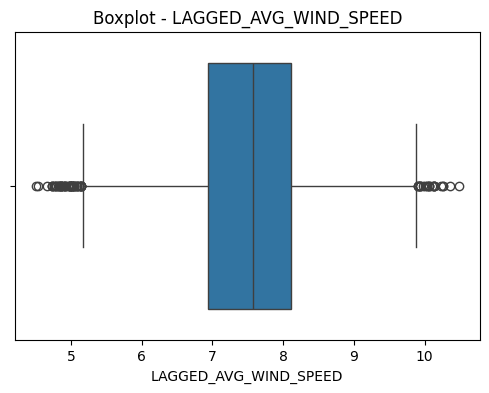

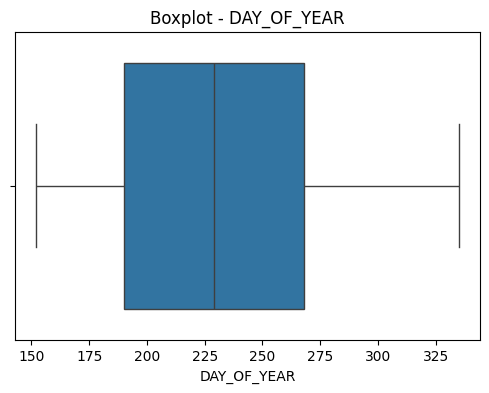

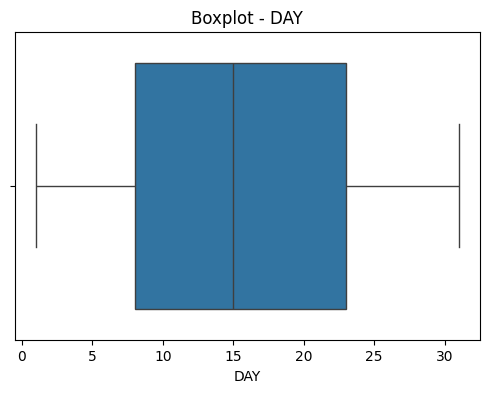

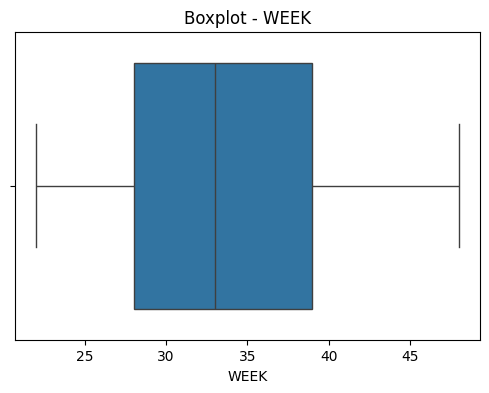

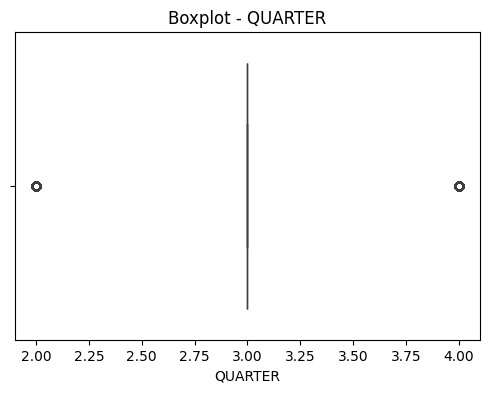

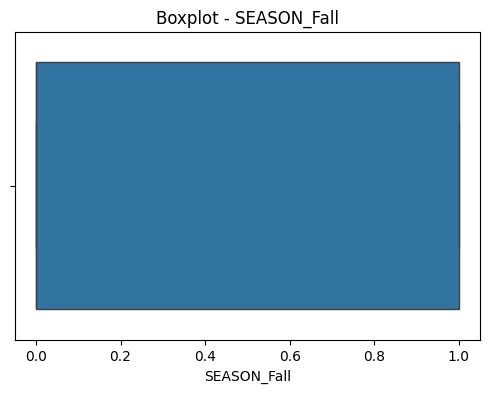

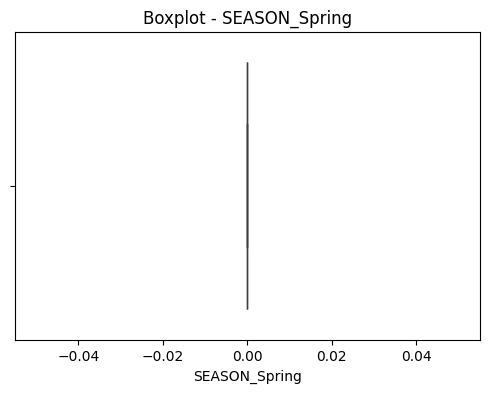

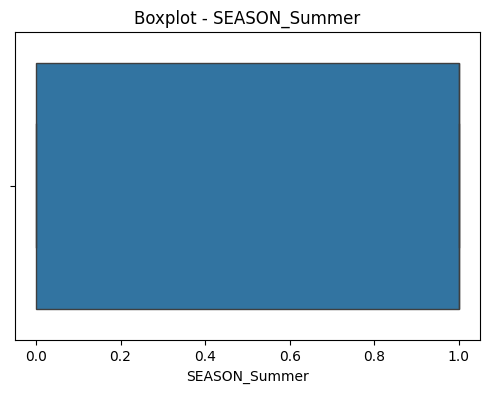

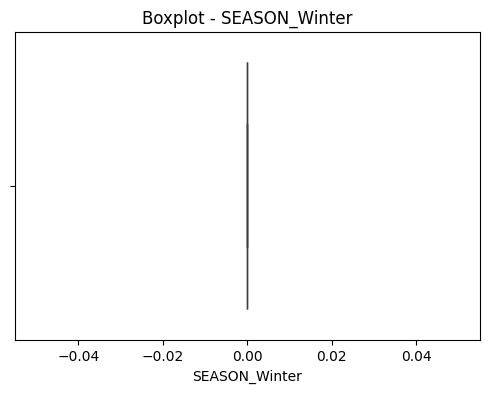

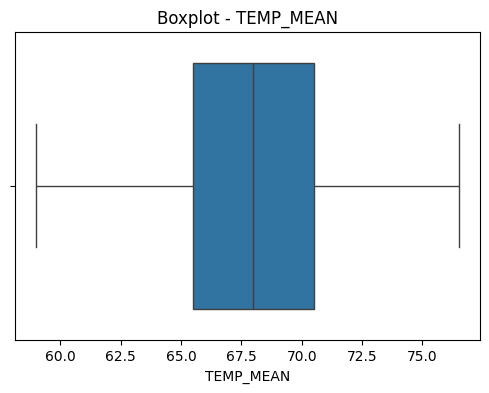

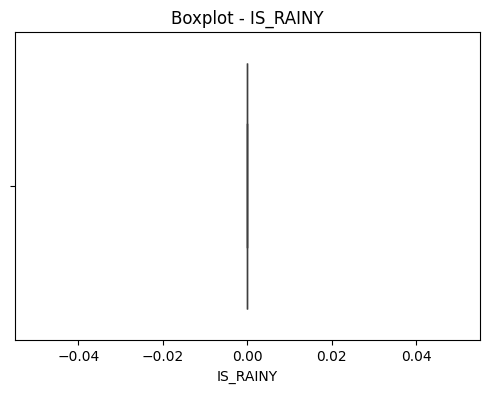

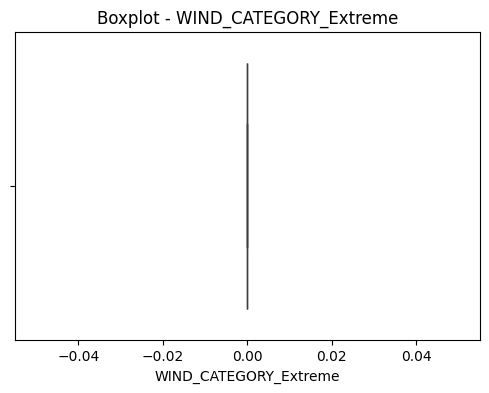

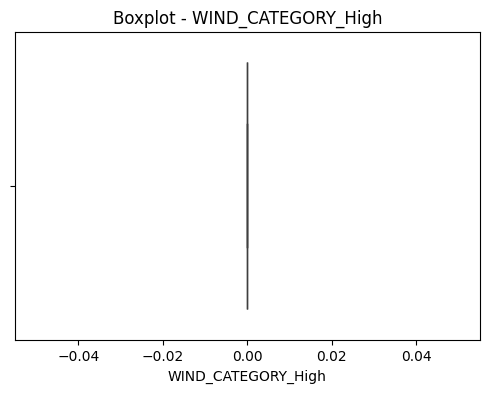

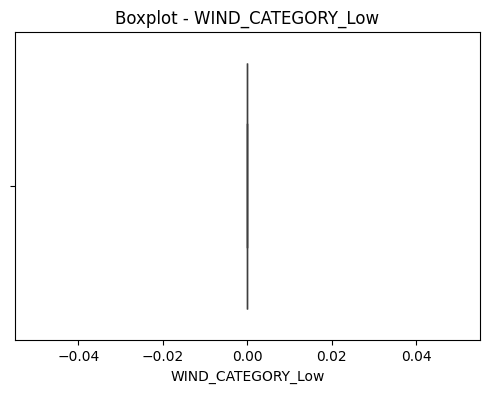

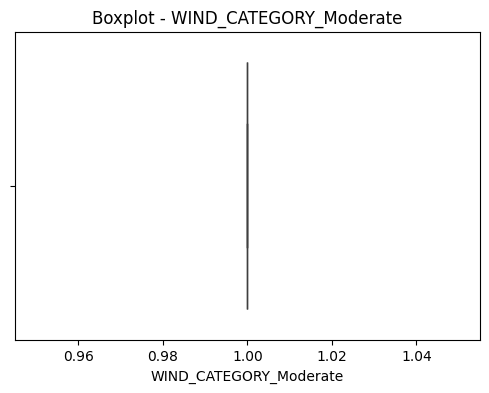

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df_clean.drop(columns=['FIRE_START_DAY', 'DATE'])  # example target
y = df_clean['FIRE_START_DAY']

# Split first (to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data scaled and split into train/test sets.")

✅ Data scaled and split into train/test sets.


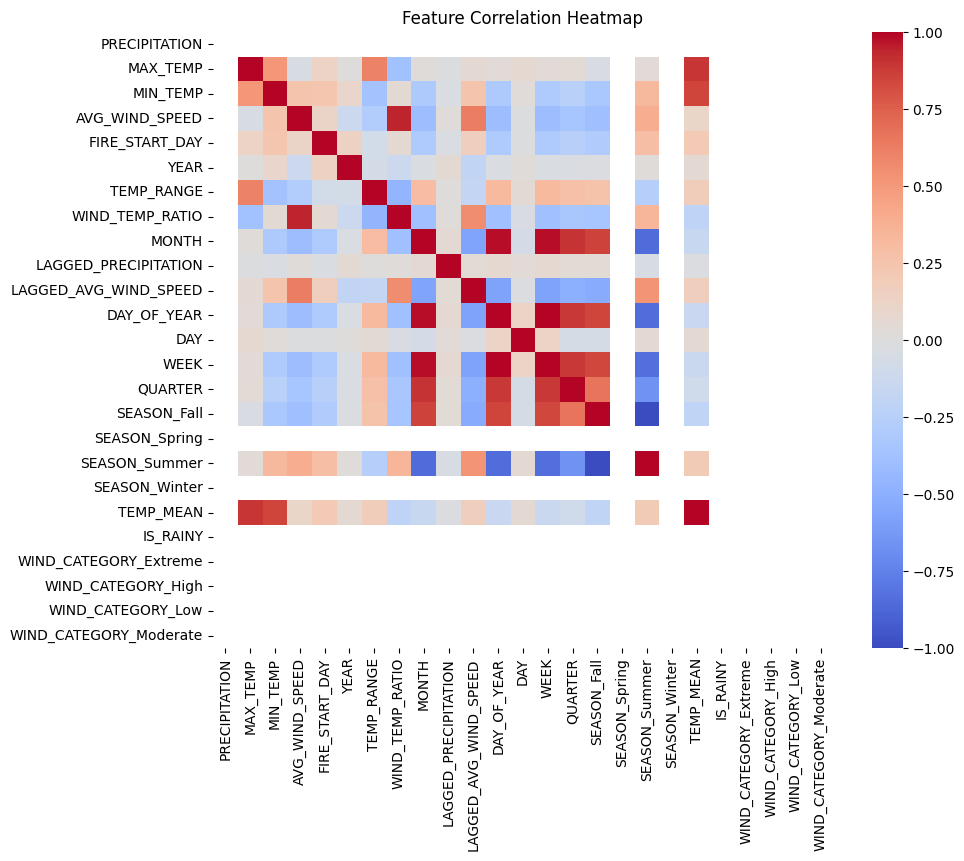

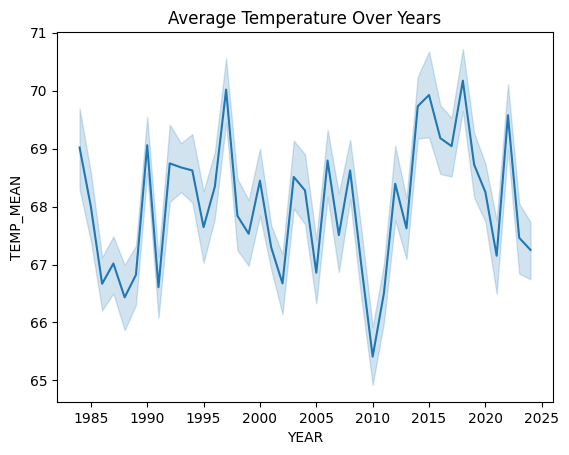

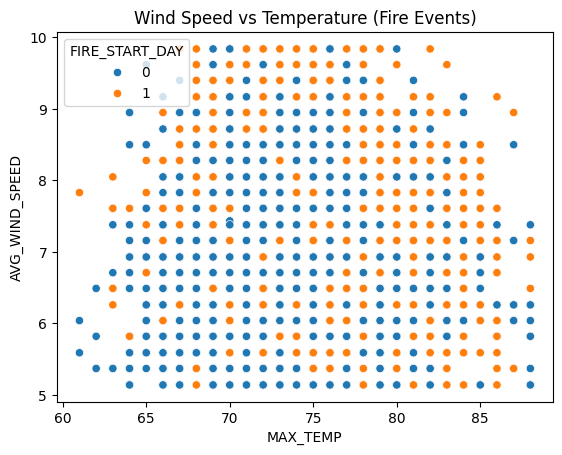

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.drop(columns=['DATE']).corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Trend over years
sns.lineplot(data=df_clean, x='YEAR', y='TEMP_MEAN')
plt.title('Average Temperature Over Years')
plt.show()

# Scatter between temperature and fire occurrences
sns.scatterplot(data=df_clean, x='MAX_TEMP', y='AVG_WIND_SPEED', hue='FIRE_START_DAY')
plt.title('Wind Speed vs Temperature (Fire Events)')
plt.show()

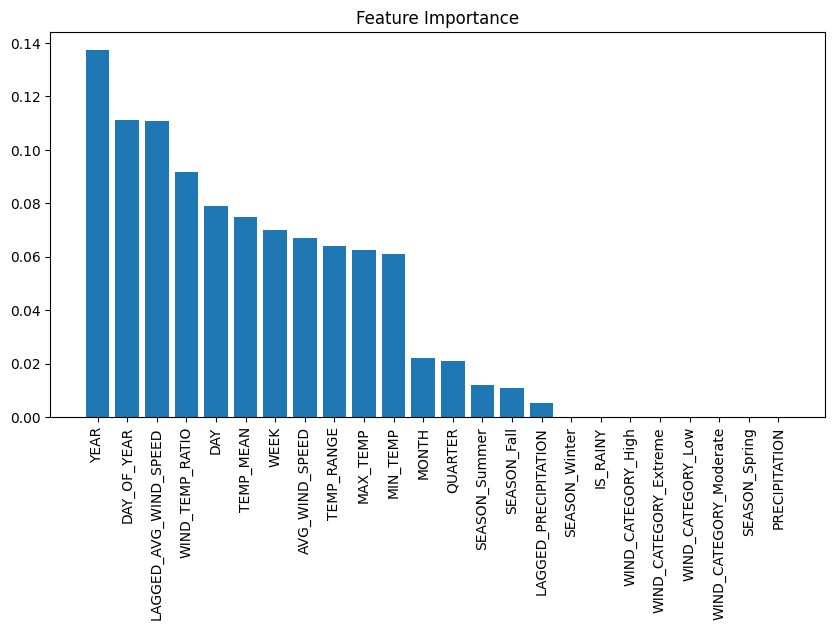

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

# Get classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Print precision, recall, and f1-score for the positive class (assuming 1 is the positive class)
print("Precision:", report['1']['precision'])
print("Recall:", report['1']['recall'])
print("F1-score:", report['1']['f1-score'])

# Print the full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - Best Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

NameError: name 'best_rf' is not defined

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# --- Import dependencies ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Initialize models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7)
}

# --- Train, Predict, and Evaluate ---
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary', zero_division=0)
    rec = recall_score(y_test, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print(classification_report(y_test, y_pred))


    # Confusion Matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# --- Convert results to DataFrame ---
results_df = pd.DataFrame(results)
print("\n✅ Model Comparison Table:")
display(results_df)

# --- Visualize performance comparison ---
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="F1 Score", data=results_df)
plt.title("Model F1 Score Comparison")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Check target balance
y_train.value_counts(normalize=True)

# If imbalance exists, apply SMOTE to balance classes
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

print("Before:", y_train.value_counts())
print("After SMOTE:", y_train_bal.value_counts())

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define grid of hyperparameters
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)
grid.fit(X_train_bal, y_train_bal)

print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Cross-Validated Accuracy:", grid.best_score_)
best_rf = grid.best_estimator_

NameError: name 'X_train_bal' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_rf = best_rf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Random Forest (Tuned):\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Random Forest - Confusion Matrix")
plt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"XGBoost:\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate both tuned RF and XGBoost
rf_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=cv, scoring='accuracy')
xgb_scores = cross_val_score(xgb, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print(f"Random Forest CV Accuracy: {np.mean(rf_scores):.4f} ± {np.std(rf_scores):.4f}")
print(f"XGBoost CV Accuracy: {np.mean(xgb_scores):.4f} ± {np.std(xgb_scores):.4f}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = {
    'Model': ['Random Forest (Tuned)', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_xgb)],
    'Recall': [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_xgb)],
    'F1': [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_xgb)]
}

df_compare = pd.DataFrame(data)
print(df_compare)

plt.figure(figsize=(8,5))
sns.barplot(data=df_compare.melt(id_vars='Model', var_name='Metric', value_name='Score'), x='Model', y='Score', hue='Metric')
plt.title('Model Comparison')
plt.show()